In [ ]:
## Project: 2014 Heart Disease Mortality of 500 Random Counties, based on the Concentration of McDonald's Restaurants
## Further Considerations by Gender, Race/Ethnicity, and Income Level

## Data Analysis Notebook

In [86]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
#Importing Cleaned CDC Data
cdc_pd = pd.read_csv("Final_Clean_CDC_Data.csv")
cdc_pd.head()

## TO DO ## THE CURRENT PIE GRAPHS ARE BASED ON THE 
## WE COULD KEEP THE PIE CHARTS AS-IS, ON A NATIONAL LEVEL AND USE THE SCATTER PLOTS
## TO ONLY SHOW OUR SAMPLE OF 500 COUNTIES. WHAT DO YOU GUYS THINK??

,State,County,"Deaths per 100,000",Gender,Race/Ethnicity,Geographical Coordinates
0,AK,"Aleutians East, AK",105.3,Overall,Overall,"(55.440626, -161.962562)"
1,AK,"Aleutians West, AK",211.9,Overall,Overall,"(52.995403, -170.251538)"
2,AK,"Anchorage, AK",257.9,Overall,Overall,"(61.159049, -149.103905)"
3,AK,"Bethel, AK",351.6,Overall,Overall,"(60.924483, -159.749655)"
4,AK,"Denali, AK",305.5,Overall,Overall,"(63.678399, -149.962076)"


In [88]:
# Importing the Dataframe of 500 Random Counties and their number of McDonalds
mcd_pd = pd.read_csv("Mcdonalds_per_County.csv")

# Making a list of the 500 Counties to pull from the CDC information
county_list = mcd_pd["county"]
county_list.head(10)

0        Ada County, ID
1      Adams County, CO
2      Adams County, IL
3      Adams County, MS
4      Adams County, ND
5      Adams County, NE
6    Alameda County, CA
7     Alcona County, MI
8    Allegan County, MI
9      Anoka County, MN
Name: county, dtype: object

In [107]:
#df[df.A.isin([0,2])]
#df.query('A in [0,2]')
# rnd_mcd = cdc_pd[cdc_pd.County.isin(county_list)]
# rnd_mcd 
cdc_pd.sort_values('County')


print(cdc_pd.loc[cdc_pd['County'].isin([county_list])])

Empty DataFrame
Columns: [State, County, Deaths per 100,000, Gender, Race/Ethnicity, Geographical Coordinates]
Index: []


In [90]:
#Pulling Mortality Rates by Gender to Build Pie Chart Visualizations

#Overall Male Mortality
overall_male = cdc_pd.groupby(["Gender"]).get_group(("Male"))
tot_male = overall_male[(overall_male["Gender"] == "Male") &  (overall_male["Race/Ethnicity"] == "Overall")]
tot_male = tot_male["Deaths per 100,000"].sum() 

#Overall Female Mortality
overall_female = cdc_pd.groupby(["Gender"]).get_group(("Female"))
tot_female = overall_female[(overall_female["Gender"] == "Female") &  (overall_female["Race/Ethnicity"] == "Overall")]
tot_female = tot_female["Deaths per 100,000"].sum()

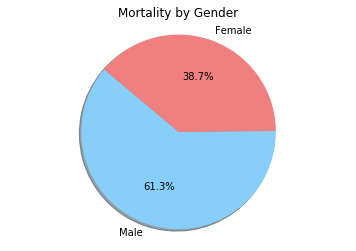

In [33]:
## Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [tot_male, tot_female]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mortality by Gender")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Gender.png")

In [45]:
#Pulling Mortality Rates by Race to Build Pie Chart Visualizations

#American Indian and Alaskan Native Mortality
aian_mort = cdc_pd.groupby(["Race/Ethnicity"]).get_group(("American Indian and Alaskan Native"))
tot_aian_mort = aian_mort[(aian_mort["Gender"] == "Overall") &  (aian_mort["Race/Ethnicity"] == "American Indian and Alaskan Native")]
tot_aian_mort = tot_aian_mort["Deaths per 100,000"].sum()

#Asian and Pacific Islander Mortality
api_mort = cdc_pd.groupby(["Race/Ethnicity"]).get_group(("Asian and Pacific Islander"))
tot_api_mort = api_mort[(api_mort["Gender"] == "Overall") &  (api_mort["Race/Ethnicity"] == "Asian and Pacific Islander")]
tot_api_mort = tot_api_mort["Deaths per 100,000"].sum()

#Black Mortality
blk_mort = cdc_pd.groupby(["Race/Ethnicity"]).get_group(("Black"))
tot_blk_mort = blk_mort[(blk_mort["Gender"] == "Overall") &  (blk_mort["Race/Ethnicity"] == "Black")]
tot_blk_mort = tot_blk_mort["Deaths per 100,000"].sum()

#Hispanic Mortality
his_mort = cdc_pd.groupby(["Race/Ethnicity"]).get_group(("Hispanic"))
tot_his_mort = his_mort[(his_mort["Gender"] == "Overall") &  (his_mort["Race/Ethnicity"] == "Hispanic")]
tot_his_mort = tot_his_mort["Deaths per 100,000"].sum()

#White Mortality
wht_mort = cdc_pd.groupby(["Race/Ethnicity"]).get_group(("White"))
tot_wht_mort = wht_mort[(wht_mort["Gender"] == "Overall") &  (wht_mort["Race/Ethnicity"] == "White")]
tot_wht_mort = tot_wht_mort["Deaths per 100,000"].sum()


1135514.0

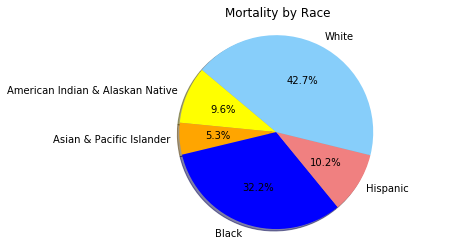

In [52]:
## Labels for the sections of our pie chart
labels = ["American Indian & Alaskan Native", "Asian & Pacific Islander", "Black", "Hispanic", "White"]

# The values of each section of the pie chart
sizes = [tot_aian_mort, tot_api_mort, tot_blk_mort, tot_his_mort, tot_wht_mort]

# The colors of each section of the pie chart
colors = ["yellow", "orange", "blue", "lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mortality by Race")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Race.png")